# #WorkUnderProgress

# Basic Transformations and Filters

In [1]:
import cv2
import numpy as np
#For embedding plotted figures on the notebook 
%matplotlib inline
import os
color = ('b','g','r')

First, we will take the functions removeGrid() and dispImage from the previous section and keep it in `utils.py` for easy access in all files

In [2]:
from utils import *

## 1) Histogram Equalization

The motive behind trying histogram equalization is that we want to spread the distribution of pixel intensities to make it more uniform across all values. This can help make a very bright image seem normal, or a foggy image (where all pixel values will be around 

In [9]:
img = cv2.imread(os.path.join('Elements','histeq.jpg'), 0)
equ = cv2.equalizeHist(img) # Created the equalized image

h1, _ = np.histogram(img, 255)
h2, _ = np.histogram(equ, 255)

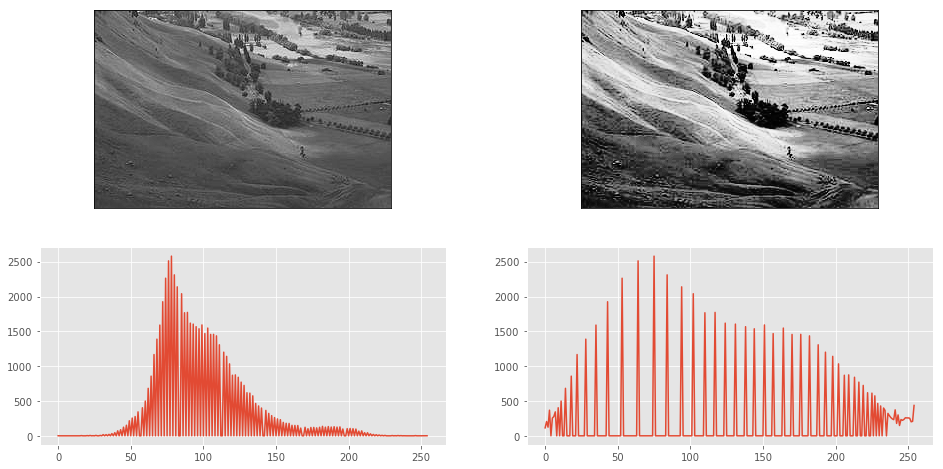

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(221)
removeGrid()
dispImage(img)
plt.subplot(222)
removeGrid()
dispImage(equ)
plt.style.use('ggplot')
plt.subplot(223)
plt.plot(h1)
plt.subplot(224)
plt.plot(h2)

## 2) Gaussian Filters

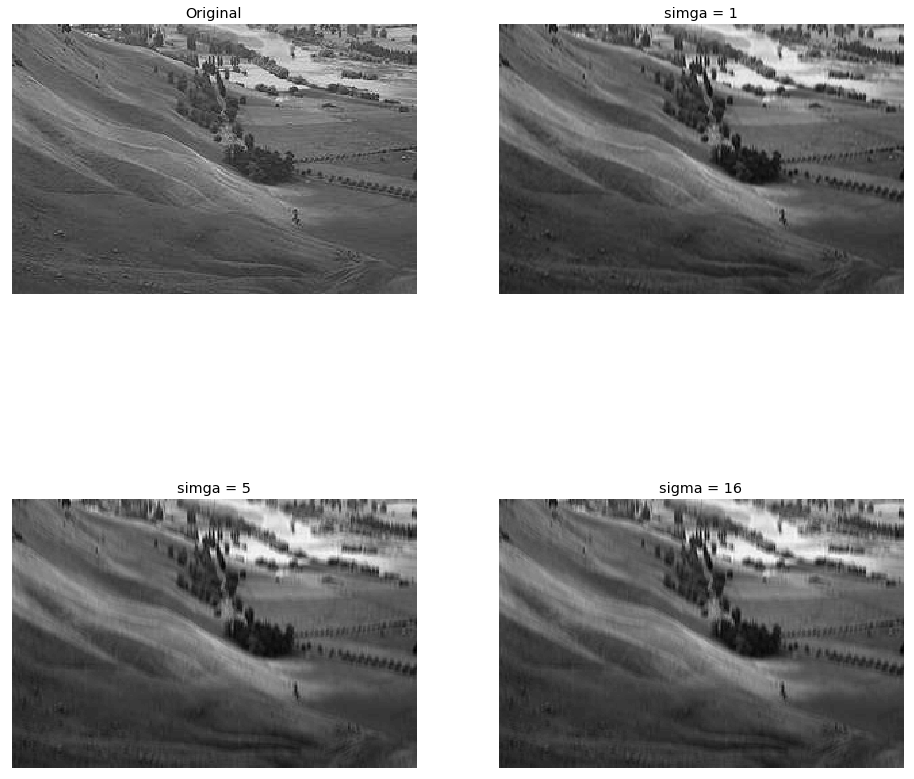

In [10]:
kernel1 = cv2.getGaussianKernel(5,1.0)
kernel2 = cv2.getGaussianKernel(5,10.0)
kernel3 = cv2.getGaussianKernel(5,200.0)
dst1 = cv2.filter2D(img,-1,kernel1)
dst2 = cv2.filter2D(img,-1,kernel2)
dst3 = cv2.filter2D(img,-1,kernel3)

plt.figure(figsize=(16, 16))
plt.subplot(2,2,1),dispImage(img),plt.title('Original')
plt.subplot(2,2,2),dispImage(dst1),plt.title('simga = 1')
plt.subplot(2,2,3),dispImage(dst2),plt.title('simga = 5')
plt.subplot(2,2,4),dispImage(dst3),plt.title('sigma = 16')
plt.show()

## 3) Affine Transformations

Any affine transformation can be represented as:

\begin{equation*}
   \left(
    \begin{array}{c}
      x'\\
      y' 
    \end{array}
  \right)
   = \left(
    \begin{array}{ccc}
      a & b & c \\
      d & e & f \\
    \end{array}
  \right)
  \left(
    \begin{array}{c}
      x\\
      y \\
      1
    \end{array}
  \right)
\end{equation*}

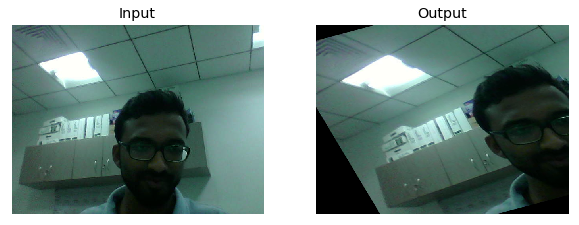

In [11]:
img = cv2.imread(os.path.join('Elements','myimage.png'))

rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(121),dispImage(img),plt.title('Input')
plt.subplot(122),dispImage(dst),plt.title('Output')
plt.show()

### 3.1) Translation

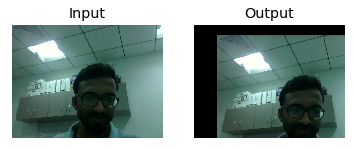

In [7]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),dispImage(img),plt.title('Input')
plt.subplot(122),dispImage(dst),plt.title('Output')
plt.show()

### 3.2) Rotation

[[   0.70710678    0.70710678  -75.97979746]
 [  -0.70710678    0.70710678  296.56854249]]


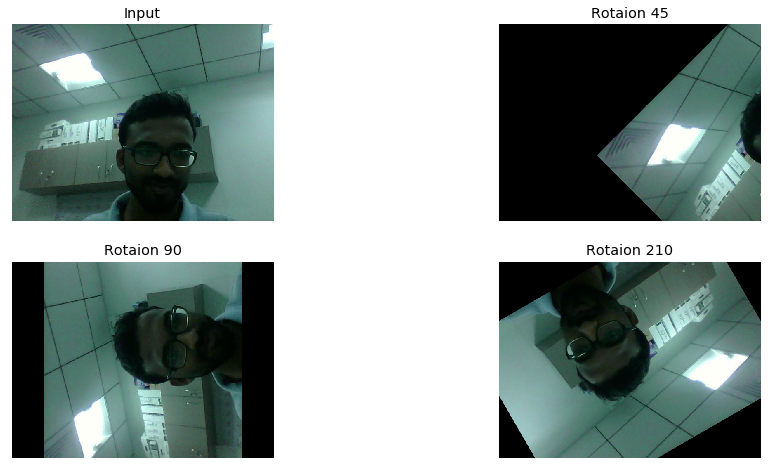

In [13]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
print(M)
theta = -np.pi/4.0
M = np.array([[np.cos(theta),-np.sin(theta),rows/2],
    [np.sin(theta),np.cos(theta),cols/2]])

dst1 = cv2.warpAffine(img,M,(cols,rows))
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst2 = cv2.warpAffine(img,M,(cols,rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),210,1)
dst3 = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(16,8))
fig1 = plt.subplot(221),dispImage(img),plt.title('Input')
fig2 = plt.subplot(222),dispImage(dst1),plt.title('Rotaion 45')
fig3 = plt.subplot(223),dispImage(dst2),plt.title('Rotaion 90')
fig4 = plt.subplot(224),dispImage(dst3),plt.title('Rotaion 210')
plt.show()

### Convolutions

### Basic Edge Detectors